In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import holidays
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
os.getcwd()

'/Users/miek/Documents/DS4B/DS4BThesisSNCB'

In [6]:
stops_post_covid = pd.read_parquet("~/Downloads/all_stops_ungrouped/all_stops_post_covid.parquet")

df = stops_post_covid
df = df.sort_values(by=['REF_TOD_TRAIN_ID','HR_ARR'])

In [7]:
df

,REF_TOD_TRAIN_ID,TRAIN_NUMBER,TRAIN_DEPARTURE_DATE,REF_PTCAR_NO,PTCAR_ORD_NO,THR_ARR,THR_DEP,HR_ARR,HR_DEP,EH_ARR,...,IDENTIFICATOR,YEAR_DEP,month,season,weekend,holiday,dep_hour_origin,day_origin,date_origin,p_indicator
800059,30282279,2989,2022-05-12,840,101,1900-01-01 00:00:00,2022-05-12 18:35:00,1900-01-01 00:00:00,2022-05-12 18:35:52,0,...,15,2022,5.0,Spring,0.0,0.0,18.0,12.0,2022-05-12,0
834355,30282279,2989,2022-05-12,436,102,2022-05-12 18:42:00,2022-05-12 18:43:00,2022-05-12 18:42:33,2022-05-12 18:43:24,33,...,15,2022,5.0,Spring,0.0,0.0,18.0,12.0,2022-05-12,0
843543,30282279,2989,2022-05-12,924,103,2022-05-12 18:48:00,2022-05-12 18:48:00,2022-05-12 18:47:36,2022-05-12 18:48:12,-23,...,15,2022,5.0,Spring,0.0,0.0,18.0,12.0,2022-05-12,0
835773,30282279,2989,2022-05-12,554,105,2022-05-12 18:53:00,2022-05-12 18:55:00,2022-05-12 18:53:03,2022-05-12 18:55:51,3,...,15,2022,5.0,Spring,0.0,0.0,18.0,12.0,2022-05-12,0
817380,30282279,2989,2022-05-12,1232,107,2022-05-12 18:58:00,2022-05-12 18:59:00,2022-05-12 18:59:42,2022-05-12 19:02:04,102,...,15,2022,5.0,Spring,0.0,0.0,18.0,12.0,2022-05-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907925,32456196,17200,2023-04-21,820,113,2023-04-21 06:18:00,2023-04-21 06:19:00,2023-04-21 06:44:20,2023-04-21 06:45:58,1580,...,69,2023,4.0,Spring,0.0,0.0,5.0,21.0,2023-04-21,0
907940,32456196,17200,2023-04-21,1229,114,2023-04-21 06:23:00,2023-04-21 06:24:00,2023-04-21 06:49:50,2023-04-21 06:50:57,1610,...,69,2023,4.0,Spring,0.0,0.0,5.0,21.0,2023-04-21,0
899045,32456196,17200,2023-04-21,278,116,2023-04-21 06:28:00,1900-01-01 00:00:00,2023-04-21 06:53:44,1900-01-01 00:00:00,1544,...,None,2023,4.0,Spring,0.0,0.0,5.0,21.0,2023-04-21,0
938136,32456359,18709,2023-04-21,70,101,1900-01-01 00:00:00,2023-04-21 12:29:00,1900-01-01 00:00:00,2023-04-21 12:33:51,0,...,162,2023,4.0,Spring,0.0,0.0,12.0,21.0,2023-04-21,0


In [8]:
# Define a function to calculate binary values for changes
def get_change(row):
    if row['LINE'] == row['prev_LINE']:
        return 0
    else:
        return 1

# Group the dataframe by REF_TOD_TRAIN_ID
groups = df.groupby('TRAIN_NUMBER')

# Create an empty dictionary to store the binary matrices for each group
binary_matrices = {}

# Loop through each group and create a binary matrix
for group_name, group_df in groups:
    # Apply the function to create the binary matrix
    group_df['prev_LINE'] = group_df['LINE'].shift(1)
    group_df['change'] = group_df.apply(get_change, axis=1)
    group_pivot = group_df.pivot_table(values='change', index='LINE', columns='prev_LINE', fill_value=0)
    # Create the symmetric matrix
    group_pivot = group_pivot.add(group_pivot.T, fill_value=0)
    # Sort the index and columns to create the desired order
    group_pivot = group_pivot.sort_index(axis=0).sort_index(axis=1)
    # Set the diagonal elements to 1
    np.fill_diagonal(group_pivot.values, 0)
    # Add the binary matrix to the dictionary
    binary_matrices[group_name] = group_pivot

# Concatenate the binary matrices into one matrix
binary_matrix = pd.concat(binary_matrices.values(), keys=binary_matrices.keys())
binary_matrix

0.0    36.0   37.0   50.0   2.0    27.0   161.0  28.0   75.0    
11    0.0     0.0    1.0    1.0    1.0    NaN    NaN    NaN    NaN    NaN  \
      36.0    1.0    0.0    1.0    0.0    NaN    NaN    NaN    NaN    NaN   
      37.0    1.0    1.0    0.0    1.0    NaN    NaN    NaN    NaN    NaN   
      50.0    1.0    0.0    1.0    0.0    NaN    NaN    NaN    NaN    NaN   
13    0.0     0.0    1.0    1.0    1.0    0.0    NaN    NaN    NaN    NaN   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
19968 94.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19970 94.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19972 94.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19974 94.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19976 94.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            66.0   ...  147.0  167.0  44.0   42.0   43.0   40.0   165.0   
11    0.0     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN  \
      36.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
      37.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
      50.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13    0.0     NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
19968 94.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19970 94.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19972 94.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19974 94.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19976 94.0    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            166.0  4.0    82.0   
11    0.0     NaN    NaN    NaN  
      36.0    NaN    NaN    NaN  
      37.0    NaN    NaN    NaN  
      50.0    NaN    NaN    NaN  
13    0.0     NaN    NaN    NaN  
...           ...    ...    ...  
19968 94.0    NaN    NaN    NaN  
19970 94.0    NaN    NaN    NaN  
19972 94.0    NaN    NaN    NaN  
19974 94.0    NaN    NaN    NaN  
19976 94.0    NaN    NaN    NaN  

[24588 rows x 68 columns]

In [9]:
binary_matrix = binary_matrix.fillna(0)

binary_matrix = binary_matrix.reset_index()

binary_matrix

,level_0,level_1,0.0,36.0,37.0,50.0,2.0,27.0,161.0,28.0,...,147.0,167.0,44.0,42.0,43.0,40.0,165.0,166.0,4.0,82.0
0,11,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,36.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,37.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,19968,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24584,19970,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24585,19972,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24586,19974,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
binary_matrix = binary_matrix.drop(columns='level_0')
binary_matrix

,level_1,0.0,36.0,37.0,50.0,2.0,27.0,161.0,28.0,75.0,...,147.0,167.0,44.0,42.0,43.0,40.0,165.0,166.0,4.0,82.0
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24584,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24585,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24586,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
binary_matrix = binary_matrix.rename(columns={'level_1': 'LINE'})
binary_matrix


,LINE,0.0,36.0,37.0,50.0,2.0,27.0,161.0,28.0,75.0,...,147.0,167.0,44.0,42.0,43.0,40.0,165.0,166.0,4.0,82.0
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24583,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24584,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24585,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24586,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
adj_max = binary_matrix.groupby('LINE').max()
adj_max = adj_max.sort_index(axis=0).sort_index(axis=1)
adj_max = adj_max.applymap(lambda x: 1 if x > 1 else x)
adj_max

,0.0,2.0,4.0,10.0,12.0,13.0,15.0,16.0,19.0,21.0,...,139.0,140.0,144.0,147.0,154.0,161.0,162.0,165.0,166.0,167.0
LINE,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
162.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


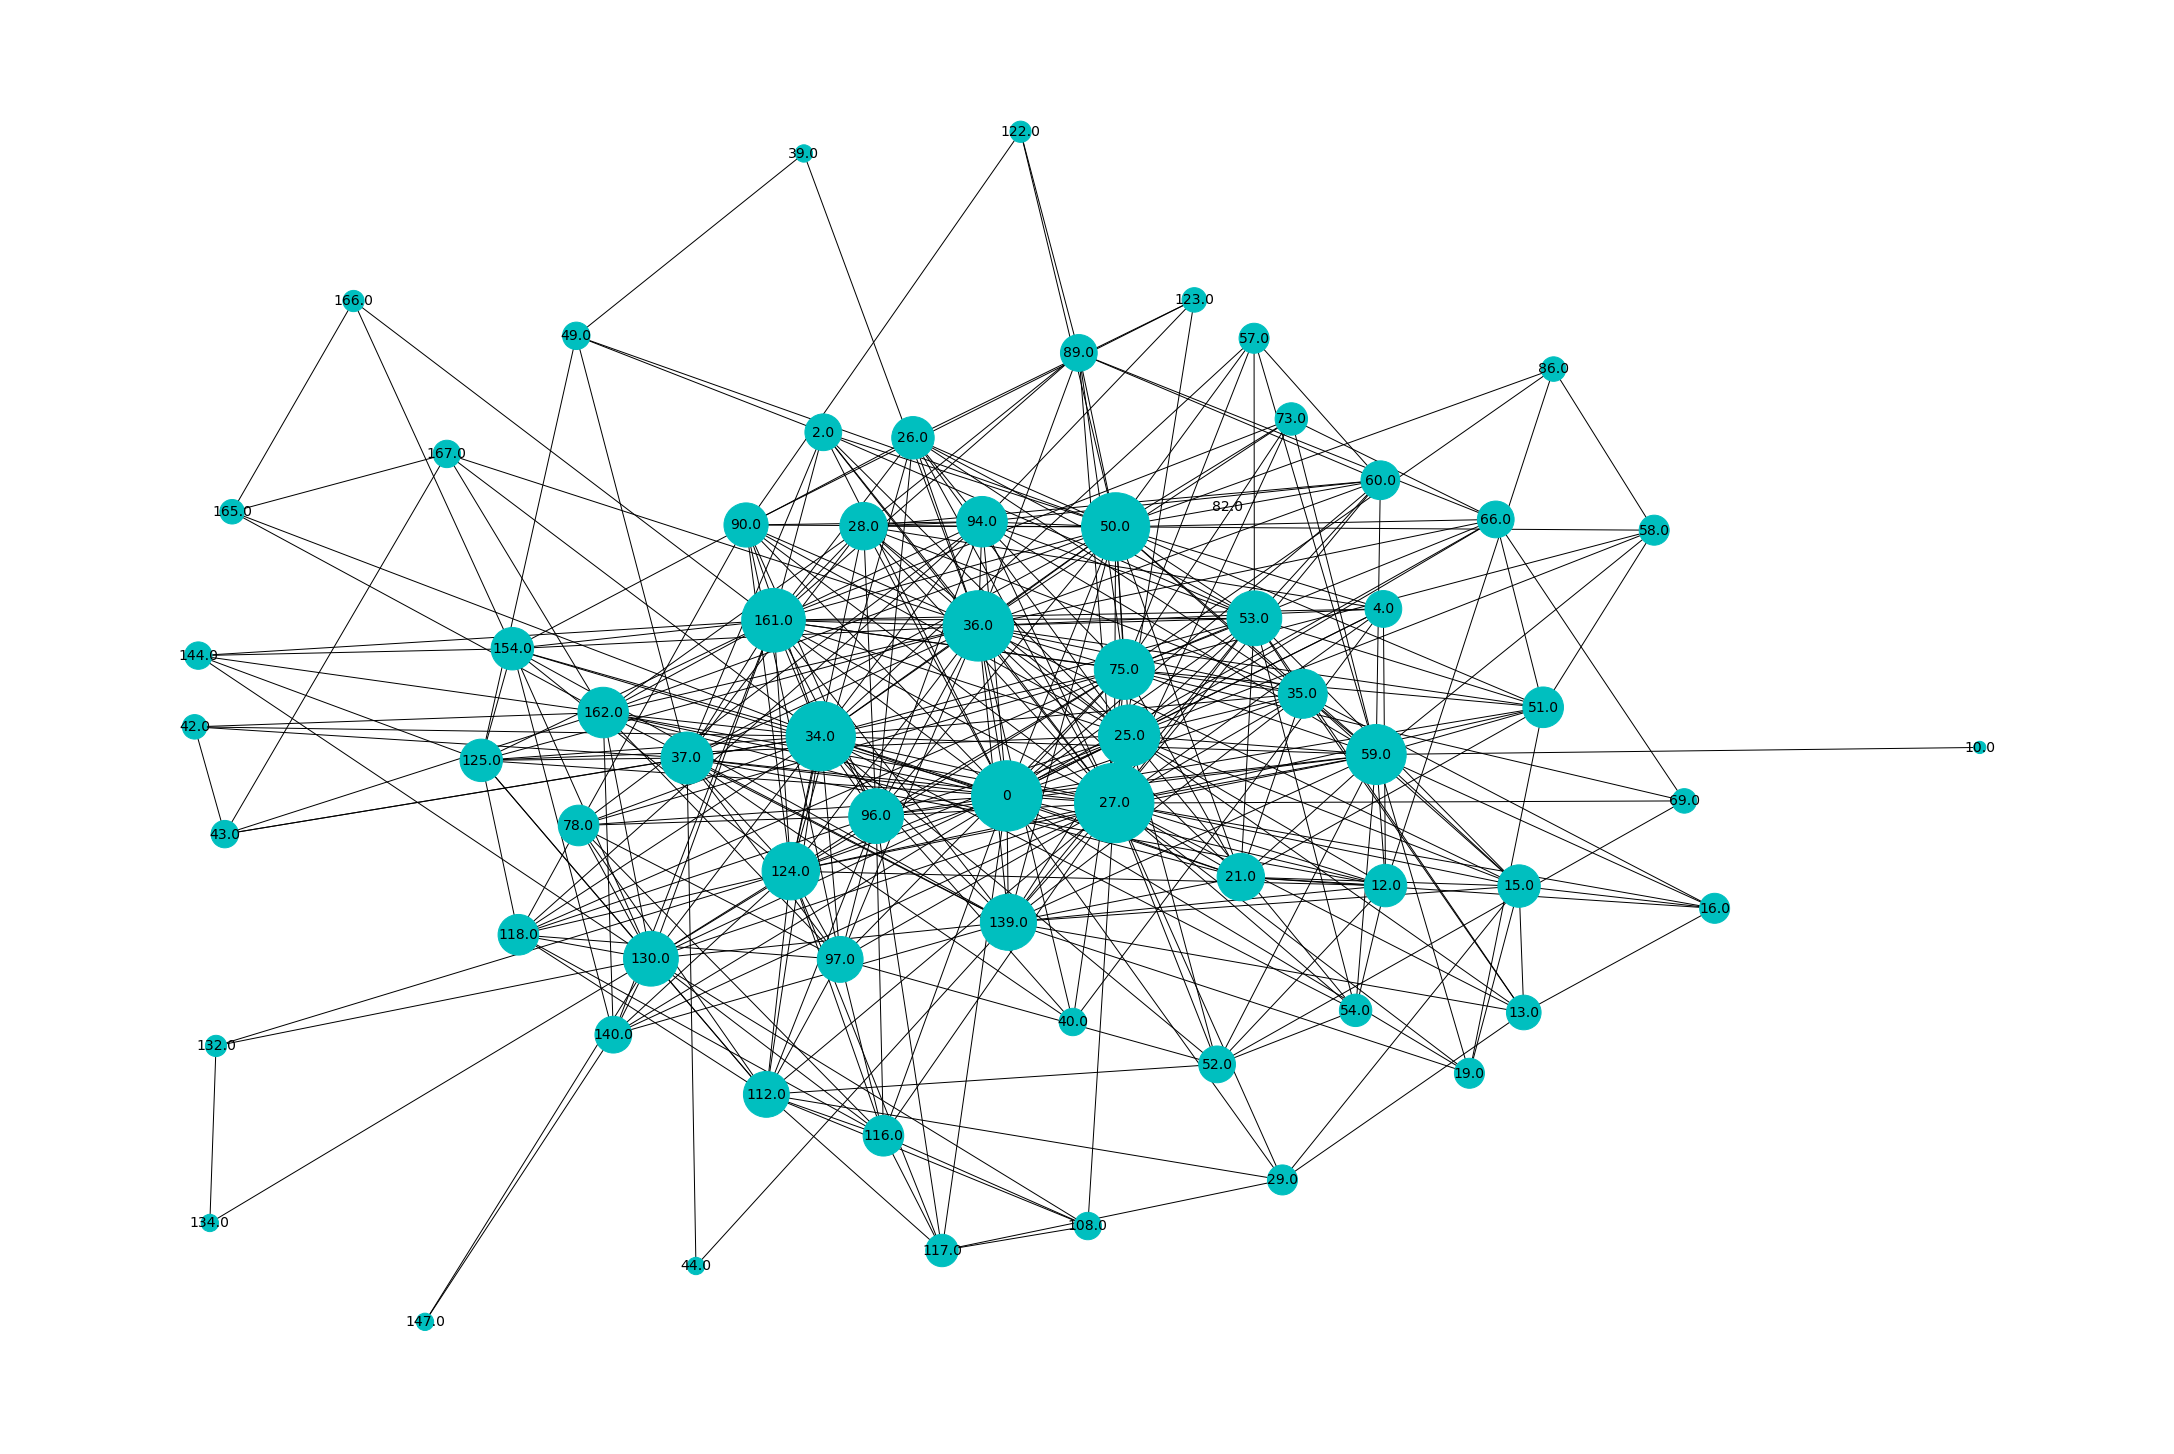

In [13]:
plt.figure(figsize=(30,20))
# Create the graph
graph = nx.Graph(adj_max)

# Compute the degree of each node
degrees = dict(nx.degree(graph))

# Set the node size based on the degree
node_sizes = [v * 150 for v in degrees.values()]

# Draw the graph with a Kamada-Kawai layout
pos = nx.kamada_kawai_layout(graph)
nx.draw(graph, pos=pos, with_labels=True, node_color='c', node_size=node_sizes, edge_color='k', font_size=14)

# Show the plot
plt.show()

In [18]:
# calculate the node degree, betweenness, and degree centrality
graph = nx.Graph(adj_max)
degree = dict(graph.degree())
betweenness = nx.betweenness_centrality(graph)
centrality = nx.degree_centrality(graph)
pagerank =  nx.pagerank(graph) # use pagerank_numpy instead of pagerank


# Combine the results into a dataframe
network_char = pd.DataFrame({'LINE': list(graph.nodes()),
                             'Degree': list(degree.values()),
                             'Betweenness': list(betweenness.values()),
                             'Centrality': list(centrality.values()),
                             'Pagerank': list(pagerank.values())})

network_char

,LINE,Degree,Betweenness,Centrality,Pagerank
0,0.0,33,0.063468,0.492537,0.036023
1,123.0,4,0.000057,0.059701,0.006159
2,52.0,9,0.003274,0.134328,0.011638
3,166.0,3,0.000588,0.044776,0.005822
4,124.0,22,0.037394,0.328358,0.025447
...,...,...,...,...,...
63,16.0,6,0.000226,0.089552,0.008263
64,15.0,12,0.004122,0.179104,0.014586
65,13.0,8,0.001149,0.119403,0.010413
66,10.0,1,0.000000,0.014925,0.003249


In [19]:
print(network_char[network_char['Degree'] == network_char['Degree'].max()][['LINE', 'Degree']])
print(network_char[network_char['Betweenness'] == network_char['Betweenness'].max()][['LINE', 'Betweenness']])
print(network_char[network_char['Centrality'] == network_char['Centrality'].max()][['LINE', 'Centrality']])
print(network_char[network_char['Pagerank'] == network_char['Pagerank'].max()][['LINE', 'Pagerank']])

   LINE  Degree
6  27.0      42
   LINE  Betweenness
6  27.0     0.152976
   LINE  Centrality
6  27.0    0.626866
   LINE  Pagerank
6  27.0  0.046389


In [20]:
network_char.sort_values(by="Degree", ascending=False)

,LINE,Degree,Betweenness,Centrality,Pagerank
6,27.0,42,0.152976,0.626866,0.046389
0,0.0,33,0.063468,0.492537,0.036023
58,36.0,33,0.075511,0.492537,0.036991
31,34.0,32,0.098940,0.477612,0.036517
14,50.0,31,0.070081,0.462687,0.034921
...,...,...,...,...,...
19,134.0,2,0.000000,0.029851,0.005189
40,147.0,2,0.000000,0.029851,0.004490
54,44.0,2,0.000000,0.029851,0.004274
66,10.0,1,0.000000,0.014925,0.003249


In [21]:
network_char.sort_values(by="Betweenness", ascending=False)

,LINE,Degree,Betweenness,Centrality,Pagerank
6,27.0,42,0.152976,0.626866,0.046389
31,34.0,32,0.098940,0.477612,0.036517
58,36.0,33,0.075511,0.492537,0.036991
42,130.0,20,0.074619,0.298507,0.026011
14,50.0,31,0.070081,0.462687,0.034921
...,...,...,...,...,...
10,82.0,0,0.000000,0.000000,0.002234
19,134.0,2,0.000000,0.029851,0.005189
40,147.0,2,0.000000,0.029851,0.004490
66,10.0,1,0.000000,0.014925,0.003249


In [22]:
network_char.sort_values(by="Centrality", ascending=False)

,LINE,Degree,Betweenness,Centrality,Pagerank
6,27.0,42,0.152976,0.626866,0.046389
0,0.0,33,0.063468,0.492537,0.036023
58,36.0,33,0.075511,0.492537,0.036991
31,34.0,32,0.098940,0.477612,0.036517
14,50.0,31,0.070081,0.462687,0.034921
...,...,...,...,...,...
19,134.0,2,0.000000,0.029851,0.005189
40,147.0,2,0.000000,0.029851,0.004490
54,44.0,2,0.000000,0.029851,0.004274
66,10.0,1,0.000000,0.014925,0.003249


In [23]:
network_char.sort_values(by="Pagerank", ascending=False)

,LINE,Degree,Betweenness,Centrality,Pagerank
6,27.0,42,0.152976,0.626866,0.046389
58,36.0,33,0.075511,0.492537,0.036991
31,34.0,32,0.098940,0.477612,0.036517
0,0.0,33,0.063468,0.492537,0.036023
14,50.0,31,0.070081,0.462687,0.034921
...,...,...,...,...,...
29,39.0,2,0.000161,0.029851,0.004603
40,147.0,2,0.000000,0.029851,0.004490
54,44.0,2,0.000000,0.029851,0.004274
66,10.0,1,0.000000,0.014925,0.003249


In [24]:
network_char.to_csv("~/Documents/DS4B/DS4BThesisSNCB/data/network_char.csv", index=False)